In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import *
from pyBioInfo.IO.File import GtfFile, GtfGeneBuilder

# Number of isoforms and genes

In [13]:
with GtfFile("results/assembly/final.gtf.gz") as f:
    genes = list(GtfGeneBuilder(f))
genes = list(filter(lambda g: g.chrom != "NC_016870.1", genes))

n = 0
for g in genes:
    isoforms += len(g.transcripts)
print(len(genes), n, sep="\t")

45167	169394


# SQANTI3: NGS and TGS

In [21]:
dat1 = pd.read_csv("results/compare/sqanti3/tgs_vs_ngs/query_classification.txt", sep="\t", index_col=0)
dat2 = pd.read_csv("results/compare/sqanti3/ngs_vs_tgs/query_classification.txt", sep="\t", index_col=0)

In [23]:
d1 = dat1[dat1["structural_category"] == "intergenic"]
d2 = dat2[dat2["structural_category"] == "intergenic"]

In [29]:
v1 = len(d1)
v2 = len(dat1) - len(d1)
v3 = len(d2)
v4 = len(dat2) - len(d2)
v1, v2, v3, v4

(37655, 68609, 1484, 122641)

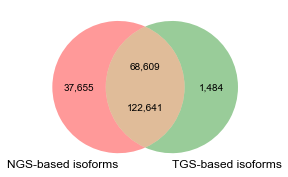

In [48]:
plt.figure(figsize=(4, 3))
v = venn2([1, 1, 1], set_labels=["NGS-based isoforms", "TGS-based isoforms"])
v.get_label_by_id('10').set_text(format(v1, ","))
v.get_label_by_id('11').set_text('%s\n\n\n\n%s' % (format(v2, ","), format(v4, ",")))
v.get_label_by_id('01').set_text(format(v3, ","))
plt.tight_layout()
plt.savefig("figures/ngs_vs_tgs.venn2.pdf", dpi=300)

In [2]:
with GtfFile("results/assembly/ngs_tgs.merged.gtf.gz") as f:
    records = [x for x in f]

In [3]:
gids = [r.attributes["gene_id"] for r in records]
len(gids), len(set(gids))

(2353788, 37111)

In [ ]:
with GtfFile("results/assembly/final.gtf.gz") as f:
    records = [x for x in f]
